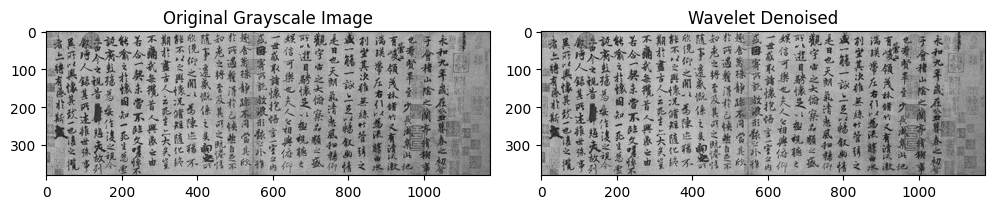

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pywt
from skimage.restoration import denoise_wavelet

# Load the image and convert to grayscale if not already
image = cv2.imread('C:/Users/Nehal/Desktop/Ancient Text Processing/chinese.png')
if len(image.shape) == 3:  # Check if the image is colored (RGB)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    grayscale_image = image

# Multiscale Gaussian Denoising
def multiscale_gaussian_denoising(image):
    scales = [3, 5, 7]  # Different Gaussian kernel sizes
    blurred_images = [cv2.GaussianBlur(image, (k, k), 0) for k in scales]
    combined_image = sum(blurred_images) / len(blurred_images)  # Average of scales
    return np.uint8(combined_image)

gaussian_denoised = multiscale_gaussian_denoising(grayscale_image)

# Wavelet Denoising
def wavelet_denoising(image):
    denoised = denoise_wavelet(image, method='BayesShrink', mode='soft', wavelet_levels=5,
                               wavelet='db1', rescale_sigma=True)
    denoised = (denoised * 255).astype(np.uint8)  # Convert to 8-bit grayscale
    return denoised

wavelet_denoised = wavelet_denoising(grayscale_image)

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')

# plt.subplot(1, 3, 2)
# plt.title('Multiscale Gaussian Denoised')
# plt.imshow(gaussian_denoised, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Wavelet Denoised')
plt.imshow(wavelet_denoised, cmap='gray')

plt.tight_layout()
plt.show()


In [2]:
%pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pytorch
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pytorch (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Nehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Nehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Nehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 251, in build_wheel
          return _build_backend().build_wheel(wheel_directory, config_settings,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
%pip install PyWavelets scikit-image


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np
from skimage.restoration import denoise_wavelet

def wavelet_denoising(image):
    denoised = denoise_wavelet(image, method='BayesShrink', mode='soft', wavelet_levels=3,
                               wavelet='db1', rescale_sigma=True)
    denoised = (denoised * 255).astype(np.uint8)  # Convert to 8-bit grayscale
    return denoised

def apply_clahe(image):
    # Create a CLAHE object with clip limit and tile grid size
    clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(4, 4))
    enhanced = clahe.apply(image)
    return enhanced

def enhance_text_image(image):
    # Step 1: Wavelet denoising
    denoised = wavelet_denoising(image)
    cv2.imshow('wavelet denoised', denoised)
    # Step 2: Apply CLAHE for contrast enhancement
    enhanced = apply_clahe(denoised)
    return enhanced

# Load your grayscale image
image = cv2.imread('C:/Users/Nehal/Desktop/Ancient Text Processing/chinese.png', cv2.IMREAD_GRAYSCALE)
enhanced_image = enhance_text_image(image)

# Save and display the enhanced image
cv2.imwrite('enhanced_text.png', enhanced_image)
cv2.imshow('Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
%pip install opencv-python opencv-python-headless numpy torch


   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.8/39.4 MB 256.1 kB/s eta 0:02:31
    --------------------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install torch torchvision numpy opencv-python scikit-image


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%pip uninstall opencv-python opencv-contrib-python
%pip install opencv-python-headless


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import torch
import RRDBNet_arch as arch
from skimage.restoration import denoise_wavelet

def wavelet_denoising(image):
    denoised = denoise_wavelet(image, method='BayesShrink', mode='soft', wavelet_levels=4,
                               wavelet='db1', rescale_sigma=True)
    denoised = (denoised * 255).astype(np.uint8)
    return denoised

def apply_clahe(image, clip_limit=1.0, tile_grid_size=(4, 4)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced = clahe.apply(image)
    return enhanced

def enhance_text_image(image):
    denoised = wavelet_denoising(image)
    enhanced = apply_clahe(denoised)
    return enhanced

# Load the grayscale image
image = cv2.imread('C:/Users/Nehal/Desktop/Ancient Text Processing/sanskrit.png', cv2.IMREAD_GRAYSCALE)
enhanced_image = enhance_text_image(image)

# Save the contrast-enhanced image
cv2.imwrite('enhanced_text.png', enhanced_image)

# ESRGAN Inference
def upscale_with_esrgan(image_path, model_path='C:/Users/Nehal/Desktop/Ancient Text Processing/ESRGAN/models/RRDB_ESRGAN_x4.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    torch.backends.cudnn.benchmark = True
    # Load the model
    model = arch.RRDBNet(3, 3, 64, 23, gc=32)
    model.load_state_dict(torch.load(model_path), strict=True)
    model.eval()
    model = model.to(device)

    # Preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize to [0, 1]
    img = torch.from_numpy(np.transpose(img, (2, 0, 1))).float().unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img).squeeze(0).cpu().numpy()
    
    # Postprocess the output
    output = np.transpose(output, (1, 2, 0))
    output = (output * 255).clip(0, 255).astype(np.uint8)
    

    # Save the upscaled image
    cv2.imwrite('upscaled_text2.png', output)

# Upscale the enhanced image
upscale_with_esrgan('enhanced_text.png')
# cv2.imshow('Upscaled Image', cv2.imread('upscaled_text.png'))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# image = cv2.imread('upscaled_text.png')
# plt.imshow(image)
# plt.axis('off')  # Hide axes
# plt.show()

cuda


C:\Users\Nehal\AppData\Local\Temp\ipykernel_8312\285208661.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), strict=True)


KeyboardInterrupt: 

In [ ]:
%pip install opencv-python opencv-python-headless numpy torch


   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.5/39.4 MB 262.1 kB/s eta 0:02:29
    --------------------------------------- 0.8/39.4 MB 256.1 kB/s eta 0:02:31
    --------------------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


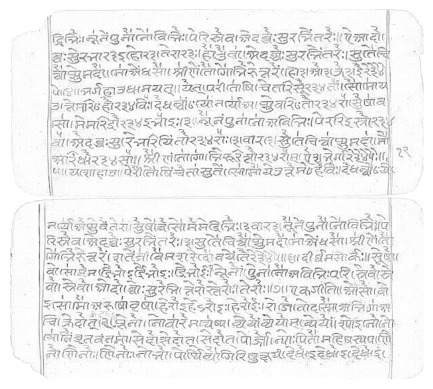

True

In [ ]:

def adaptive_background_subtraction(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Estimate background using a smaller Gaussian Blur kernel (to retain text strokes better)
    background = cv2.GaussianBlur(img, (15, 15), 0)  # Reduced kernel size from (55,55) to (25,25)

    # Perform adaptive background subtraction
    text_foreground = cv2.divide(img, background,scale=255)  # Using subtraction instead of division

    # Apply CLAHE with reduced clipLimit to prevent over-enhancement of background
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(4, 4))  # Reduced clipLimit from 2.0 to 1.5
    enhanced_img = clahe.apply(text_foreground)

    return enhanced_img

# Load and process the upscaled image
input_image_path = "upscaled_text2.png"  # Path to your upscaled image
processed_image = adaptive_background_subtraction(input_image_path)

# Display the processed image
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

# Save the result
cv2.imwrite("cleaned_text_adaptive.png", processed_image)


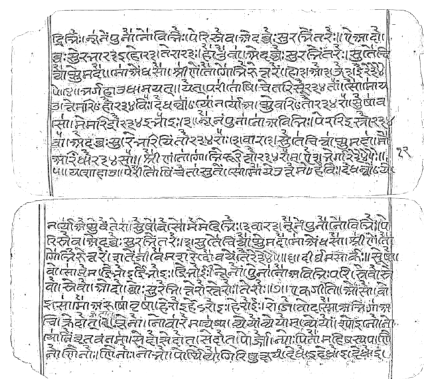

True

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola

def sauvola_background_subtraction(image_path, window_size=45, k=1.5):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sauvola thresholding
    thresh_sauvola = threshold_sauvola(img, window_size=window_size, k=k)
    
    # Binarize image: Set pixels below the threshold to 0 (background) and others to 255 (text)
    binary_image = (img > thresh_sauvola).astype(np.uint8) * 255

    return binary_image

# Load and process the upscaled image
input_image_path = "cleaned_text_adaptive.png"  # Path to your upscaled image
processed_image = sauvola_background_subtraction(input_image_path, window_size=35, k=0.15)  # Adjust parameters as needed

# Display the processed image
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

# Save the result
cv2.imwrite("cleaned_text_sauvola.png", processed_image)


In [1]:
import cv2
import numpy as np
import torch
import RRDBNet_arch as arch
from skimage.restoration import denoise_wavelet
def upscale_with_esrgan(image_path, model_path='C:/Users/Nehal/Desktop/Ancient Text Processing/ESRGAN/models/RRDB_ESRGAN_x4.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    torch.backends.cudnn.benchmark = True
    # Load the model
    model = arch.RRDBNet(3, 3, 64, 23, gc=32)
    model.load_state_dict(torch.load(model_path), strict=True)
    model.eval()
    model = model.to(device)

    # Preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize to [0, 1]
    img = torch.from_numpy(np.transpose(img, (2, 0, 1))).float().unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img).squeeze(0).cpu().numpy()
    
    # Postprocess the output
    output = np.transpose(output, (1, 2, 0))
    output = (output * 255).clip(0, 255).astype(np.uint8)
    

    # Save the upscaled image
    cv2.imwrite('after_thresholding.png', output)

# Upscale the enhanced image
upscale_with_esrgan('C:/Users/Nehal/Desktop/Ancient Text Processing/new_pipeline/cleaned_text_sauvola.png')

cuda


C:\Users\Nehal\AppData\Local\Temp\ipykernel_8312\2562222084.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), strict=True)


OutOfMemoryError: CUDA out of memory. Tried to allocate 4.54 GiB. GPU 0 has a total capacity of 2.00 GiB of which 0 bytes is free. Of the allocated memory 4.71 GiB is allocated by PyTorch, and 3.26 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [42]:
import torch

torch.cuda.empty_cache()  # Clears unused memory
torch.cuda.ipc_collect()  # Collects garbage memory
del model  # Deletes the model variable
torch.cuda.empty_cache()  # Clears memory


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [36]:
import cv2
img = cv2.imread('C:/Users/Nehal/Desktop/Ancient Text Processing/new_pipeline/cleaned_text_sauvola.png')
print(img.shape)

(2916, 3264, 3)
